PHASE 1 PROJECT


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


SOLUTION


Entertainment industry is one of the booming businesses across the world. Factors contributing to this ivolves easy accesiblity of content in this era whereby a good percentage of the population has accessibilty of gadgets from PCs, smart phones  which is as well complimented by steaming sites such as neflix, showmax etc. For an enterprenuer delving into film making,  they have strength in numbers  only if they could  identify audience preferences and hence niche specidication.This can be easily informed what genres are  popular, the costing  of production ofcourse to inform ROI.


This project aim to:

1.point out genres that are doing well in the filmaking industry to inform niche specification

2.Check ROI for specific Genres


Solution
This project aim to:
1.point out genres that are doing well in the filmaking industry to inform niche specification
2.Check ROI for specific Genres
2. 

SECTION 1; Loading and undestanding databases

Loading and understsnding data
1. import packages
2. load data
3. Explore the data structure and its components

In [2]:
import pandas as pd
import os
import sqlite3
import numpy as np

loading and exploring tmdb data

1. TMDB DATASET
This data set contains  the tittle of the movies , the original titles, and of key a very important aspect, the popularity , vote average and vote count
There are no missing values in the data

In [3]:
tmdf = pd.read_csv("data/tmdb.movies.csv")
tmdf.info()
tmdf.isna(). sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [4]:
tmdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


2. BOM MOVIE_GROSS

This data set contain the title of the movie, studio in which the movie was produced  as well as the gross income obtained from the movies.

In [5]:
bomdf = pd.read_csv("data/bom.movie_gross.csv")
#bomdf.info()


In [6]:
#bomdf.head()

3. tn.movies budget

In [7]:
budgetsfile = "data/tn.movie_budgets.csv"
budgetsdf = pd.read_csv(budgetsfile, delimiter=',')
budgetsdf .info()
#budgetsdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
reviews_data = "data/rt.reviews.tsv"
reviewsdf = pd.read_csv(reviews_data, delimiter ='\t', encoding= 'ISO-8859-1')
#reviewsdf.head()
#reviewsdf.info()



In [9]:
rt_movies_info_file = "data/rt.movie_info.tsv"
rt_movies_info_df = pd.read_csv(rt_movies_info_file, delimiter ='\t',encoding= 'ISO-8859-1')
#rt_movies_info_df .head()
#rt_movies_info_df.info()

In [10]:
#rt_movies_info_df .head()

SECTION2: Data Preparation and Data cleaning

1. Im.db

In order to calculate get the rating per genre, we need to join the movie basics table and the movie ratings.


In [11]:
#loading the im database and identifying the available tables
conn = sqlite3.connect("data/im.db")
tables = pd.read_sql("""SELECT name FROM sqlite_master 
  WHERE type = 'table';""", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [12]:
# joining the movie_basics and the movie-ratings tables as well dropiing the missing values
imdata = ("""SELECT * FROM movie_basics as b
        JOIN movie_ratings as  r
        ON b.movie_id = r.movie_id;""")
imdf=pd.read_sql(imdata, conn)
imdf.head()
imdf=imdf.drop("runtime_minutes", axis =1)
imdf=imdf.dropna()
imdf.isna().sum()
imdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73052 non-null  object 
 1   primary_title   73052 non-null  object 
 2   original_title  73052 non-null  object 
 3   start_year      73052 non-null  int64  
 4   genres          73052 non-null  object 
 5   movie_id        73052 non-null  object 
 6   averagerating   73052 non-null  float64
 7   numvotes        73052 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 5.0+ MB


SECTION3; Data Analysis and visualization


1. Popular genres by number of votes

Checking the most trending, popular genre

In [13]:
genre_grouped = imdf.groupby('genres')["numvotes"].mean().sort_values(ascending=False)
TOP_20 = genre_grouped. head(30)
Most_voted = TOP_20.reset_index()


In [14]:
import matplotlib.pyplot as plt

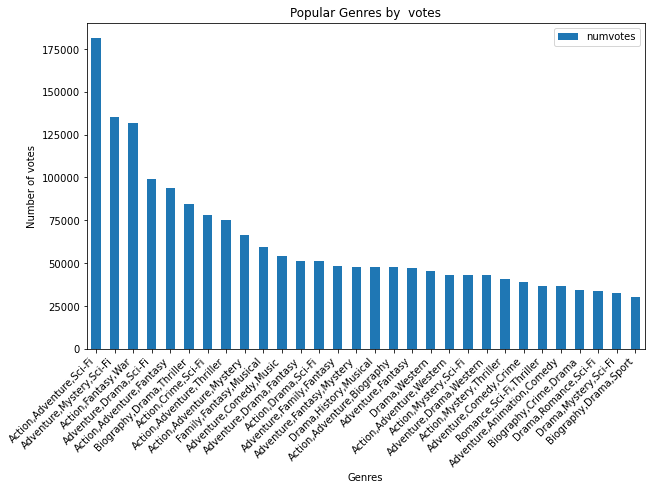

In [15]:
Most_voted.plot(kind='bar', x='genres', y='numvotes', figsize=(10, 6))
plt.xlabel('Genres')
plt.ylabel('Number of votes')
plt.title('Popular Genres by  votes')
plt.xticks(rotation=45, ha='right')
plt.show()

2. Popular genres by rating

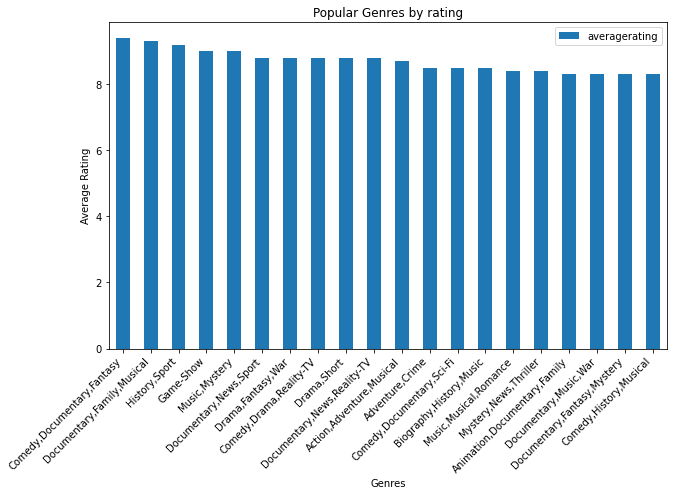

In [16]:
genre_grouped2 = imdf.groupby('genres')["averagerating"].mean().sort_values(ascending=False)
TOP_twenty = genre_grouped2. head(20)
Top_rated= TOP_twenty.reset_index()
Top_rated.plot(kind='bar', x='genres', y='averagerating', figsize=(10, 6))
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Popular Genres by rating')
plt.xticks(rotation=45, ha='right')
plt.show()


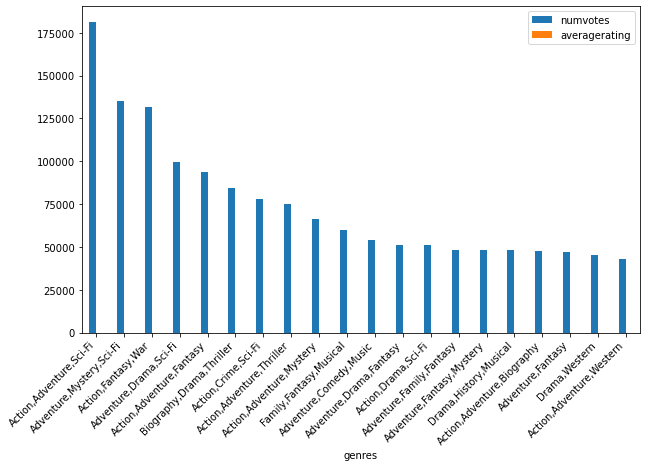

In [17]:
Mergedata = pd.merge(genre_grouped,genre_grouped2, how= 'left', on = "genres").head(20)
#Mergedata.info()
#Mergedata.head()
Mergedata.plot( kind= 'bar', figsize=(10, 6));
plt.xticks(rotation=45, ha='right')
plt.show()



3. Relationship between Production cost and Gross_income, both domestic and worldwide


In [18]:
budgetsdf.isna().sum()
budgetsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
import matplotlib.ticker as ticker

Text(0.5, 1.0, 'Relationship between Pproduction Cost and Gross income')

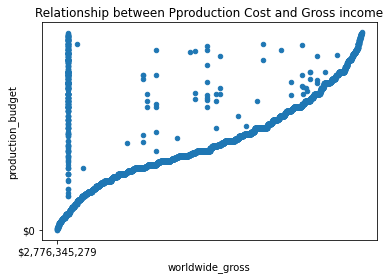

In [29]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
Scatter_plot =budgetsdf.plot.scatter( x="worldwide_gross", y="production_budget",);
#plt.xlim(0, 1000000000) 
#plt.ylim(0, 500000000)
#plt.axis("off")
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000000000.00))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(500000000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100000))
plt.title("Relationship between Pproduction Cost and Gross income")
                           


(-258.15000000000003, 5421.15, -25.400000000000002, 533.4)

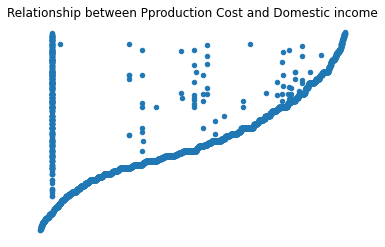

In [34]:
import matplotlib.pyplot as plt
Scatter_plot =budgetsdf.plot.scatter( x="domestic_gross", y="production_budget",);
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(100000000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50000000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10000))
plt.title("Relationship between Pproduction Cost and Domestic income")
plt.axis("off")


4. Movies with Greates ROI